# Predicting Concrete Compressive Strength - Artificial Neural Network (ANN) Modeling in TensorFlow 2.0

In this code notebook, we will import the data, scale it, perform a train-test split, and run it through various artificial neural network (ANN) configurations in TensorFlow 2.0 using Keras.

## Dataset Citation

This dataset was retrieved from the UC Irvine Machine Learning Repository from the following URL: <https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength>. 

The dataset was donated to the UCI Repository by Prof. I-Cheng Yeh of Chung-Huah University, who retains copyright for the following published paper: I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998). Additional papers citing this dataset are listed at the reference link above.

## Import the Relevant Libraries

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ANN Modeling in TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

## Data Preprocessing

### Import & Check the Data

In [3]:
df = pd.read_csv('2020_1124_Modeling_Data.csv')
concrete_data = df.copy()

In [4]:
concrete_data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Train Test Split

In [12]:
X = concrete_data.drop('Compressive_Strength',axis=1)
y = concrete_data['Compressive_Strength']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Scale the Data

In [16]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1 - ANN with 3 Hidden Layers

### Construct the Artificial Neural Network

In [19]:
# Determine number of starting nodes by finding the shape of X_train
X_train.shape

(824, 8)

In [20]:
model = Sequential()

# We will start with 2 hidden layers. 
model.add(Dense(8,activation='relu')) # All layers utilize rectified linear units (relu)
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse') # Use the adam optimization algorithm

### Train the Model on the Test Data

In [21]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
7/7 [==============================] - 0s 15ms/step - loss: 1552.9727 - val_loss: 1508.6826
Epoch 2/400
7/7 [==============================] - 0s 3ms/step - loss: 1546.8019 - val_loss: 1501.8268
Epoch 3/400
7/7 [==============================] - 0s 3ms/step - loss: 1539.6799 - val_loss: 1493.7604
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 1531.0690 - val_loss: 1484.2760
Epoch 5/400
7/7 [==============================] - 0s 2ms/step - loss: 1521.1899 - val_loss: 1472.9838
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 1509.3269 - val_loss: 1459.6383
Epoch 7/400
7/7 [==============================] - 0s 3ms/step - loss: 1495.1875 - val_loss: 1443.7256
Epoch 8/400
7/7 [==============================] - 0s 2ms/step - loss: 1478.3779 - val_loss: 1424.5239
Epoch 9/400
7/7 [==============================] - 0s 3ms/step - loss: 1457.9557 - val_loss: 1401.2220
Epoch 10/400
7/7 [==============================] - 0s 3ms/step - loss: 

7/7 [==============================] - 0s 2ms/step - loss: 131.5301 - val_loss: 124.4943
Epoch 82/400
7/7 [==============================] - 0s 2ms/step - loss: 130.7301 - val_loss: 123.4807
Epoch 83/400
7/7 [==============================] - 0s 2ms/step - loss: 130.0006 - val_loss: 122.5207
Epoch 84/400
7/7 [==============================] - 0s 2ms/step - loss: 129.2819 - val_loss: 121.5736
Epoch 85/400
7/7 [==============================] - 0s 2ms/step - loss: 128.4265 - val_loss: 120.5496
Epoch 86/400
7/7 [==============================] - 0s 2ms/step - loss: 127.7091 - val_loss: 119.7033
Epoch 87/400
7/7 [==============================] - 0s 2ms/step - loss: 127.1345 - val_loss: 118.9468
Epoch 88/400
7/7 [==============================] - 0s 2ms/step - loss: 126.4645 - val_loss: 118.1959
Epoch 89/400
7/7 [==============================] - 0s 2ms/step - loss: 125.9712 - val_loss: 117.3846
Epoch 90/400
7/7 [==============================] - 0s 2ms/step - loss: 125.3807 - val_loss: 11

Epoch 161/400
7/7 [==============================] - 0s 2ms/step - loss: 113.9272 - val_loss: 98.5213
Epoch 162/400
7/7 [==============================] - 0s 2ms/step - loss: 113.6592 - val_loss: 98.2507
Epoch 163/400
7/7 [==============================] - 0s 2ms/step - loss: 113.8323 - val_loss: 98.2880
Epoch 164/400
7/7 [==============================] - 0s 2ms/step - loss: 113.5700 - val_loss: 98.1634
Epoch 165/400
7/7 [==============================] - 0s 2ms/step - loss: 113.6367 - val_loss: 98.1876
Epoch 166/400
7/7 [==============================] - 0s 2ms/step - loss: 113.3866 - val_loss: 98.4476
Epoch 167/400
7/7 [==============================] - 0s 2ms/step - loss: 113.4359 - val_loss: 98.2130
Epoch 168/400
7/7 [==============================] - 0s 2ms/step - loss: 113.2113 - val_loss: 98.1459
Epoch 169/400
7/7 [==============================] - 0s 2ms/step - loss: 113.4303 - val_loss: 97.9401
Epoch 170/400
7/7 [==============================] - 0s 2ms/step - loss: 112.9913 

7/7 [==============================] - 0s 2ms/step - loss: 105.8002 - val_loss: 89.0243
Epoch 322/400
7/7 [==============================] - 0s 2ms/step - loss: 105.8372 - val_loss: 89.0964
Epoch 323/400
7/7 [==============================] - 0s 2ms/step - loss: 105.8320 - val_loss: 89.1280
Epoch 324/400
7/7 [==============================] - 0s 2ms/step - loss: 105.6375 - val_loss: 89.0750
Epoch 325/400
7/7 [==============================] - 0s 2ms/step - loss: 105.6565 - val_loss: 89.1161
Epoch 326/400
7/7 [==============================] - 0s 2ms/step - loss: 105.6311 - val_loss: 89.2524
Epoch 327/400
7/7 [==============================] - 0s 2ms/step - loss: 105.4883 - val_loss: 89.0969
Epoch 328/400
7/7 [==============================] - 0s 2ms/step - loss: 105.6745 - val_loss: 89.0379
Epoch 329/400
7/7 [==============================] - 0s 2ms/step - loss: 105.4730 - val_loss: 89.0415
Epoch 330/400
7/7 [==============================] - 0s 2ms/step - loss: 105.3364 - val_loss: 89

### Visualize the Loss Function

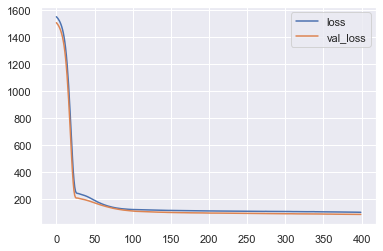

In [22]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Since the validation loss stays below the actual loss and continues to delcine with it, we observe that overfitting is minimal.

### Test the Model

In [23]:
predictions = model.predict(X_test)

### Model Evaluation

In [27]:
# Model Evaluation Metrics
MAE = mean_absolute_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
EVS = explained_variance_score(y_test,predictions)

print('EVALUATION METRICS')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE}\nRoot Mean Squared Error (RMSE):\t\t{RMSE}\nExplained Variance Score:\t\t{EVS}")

EVALUATION METRICS
-----------------------------
Mean Absolute Error (MAE):		7.23883411296363
Root Mean Squared Error (RMSE):		9.233359748913385
Explained Variance Score:		0.6691982422589368


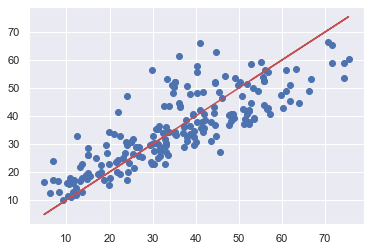

In [28]:
# Plot Model Predictions (Scatter)
plt.scatter(y_test,predictions)

# Plot Perfect predictions (Line)
plt.plot(y_test,y_test,'r')

There is clearly a wide spread of predicted values away from the perfect values. Let us experiment with adding more hidden nodes in the next section to try to increase the performance of our model.

## Model 2 - ANN with 10 Hidden Layers

### Construct the Artificial Neural Network

In [34]:
model_2 = Sequential()

# Experiment with 10 hidden layers
model_2.add(Dense(8,activation='relu')) # All layers utilize rectified linear units (relu)
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dense(4,activation='relu')) # Experiment with number of nodes
model_2.add(Dense(2,activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse') # Use the adam optimization algorithm

### Train the Model on the Test Data

In [35]:
model_2.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
7/7 [==============================] - 0s 15ms/step - loss: 1569.2802 - val_loss: 1527.6510
Epoch 2/400
7/7 [==============================] - 0s 3ms/step - loss: 1567.6498 - val_loss: 1525.9512
Epoch 3/400
7/7 [==============================] - 0s 3ms/step - loss: 1565.8867 - val_loss: 1524.0394
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 1563.7501 - val_loss: 1521.6041
Epoch 5/400
7/7 [==============================] - 0s 3ms/step - loss: 1561.0574 - val_loss: 1518.4763
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 1557.5063 - val_loss: 1514.2502
Epoch 7/400
7/7 [==============================] - 0s 3ms/step - loss: 1552.6052 - val_loss: 1508.2246
Epoch 8/400
7/7 [==============================] - 0s 3ms/step - loss: 1545.5275 - val_loss: 1499.2045
Epoch 9/400
7/7 [==============================] - 0s 3ms/step - loss: 1534.7487 - val_loss: 1485.1907
Epoch 10/400
7/7 [==============================] - 0s 3ms/step - loss: 

7/7 [==============================] - 0s 3ms/step - loss: 151.0710 - val_loss: 135.3559
Epoch 82/400
7/7 [==============================] - 0s 3ms/step - loss: 148.9019 - val_loss: 133.6914
Epoch 83/400
7/7 [==============================] - 0s 3ms/step - loss: 147.5463 - val_loss: 132.2848
Epoch 84/400
7/7 [==============================] - 0s 3ms/step - loss: 145.8955 - val_loss: 131.0391
Epoch 85/400
7/7 [==============================] - 0s 3ms/step - loss: 144.5295 - val_loss: 129.7908
Epoch 86/400
7/7 [==============================] - 0s 3ms/step - loss: 143.4794 - val_loss: 128.1191
Epoch 87/400
7/7 [==============================] - 0s 3ms/step - loss: 141.5528 - val_loss: 127.0783
Epoch 88/400
7/7 [==============================] - 0s 2ms/step - loss: 140.6105 - val_loss: 125.9190
Epoch 89/400
7/7 [==============================] - 0s 2ms/step - loss: 139.1399 - val_loss: 124.2839
Epoch 90/400
7/7 [==============================] - 0s 3ms/step - loss: 138.2433 - val_loss: 12

7/7 [==============================] - 0s 3ms/step - loss: 103.9955 - val_loss: 91.4006
Epoch 241/400
7/7 [==============================] - 0s 3ms/step - loss: 103.5449 - val_loss: 91.2071
Epoch 242/400
7/7 [==============================] - 0s 3ms/step - loss: 103.4850 - val_loss: 90.9679
Epoch 243/400
7/7 [==============================] - 0s 2ms/step - loss: 102.8936 - val_loss: 90.7689
Epoch 244/400
7/7 [==============================] - 0s 3ms/step - loss: 102.6266 - val_loss: 90.6407
Epoch 245/400
7/7 [==============================] - 0s 3ms/step - loss: 102.2597 - val_loss: 90.5584
Epoch 246/400
7/7 [==============================] - 0s 3ms/step - loss: 101.7716 - val_loss: 90.4132
Epoch 247/400
7/7 [==============================] - 0s 3ms/step - loss: 101.1852 - val_loss: 89.9878
Epoch 248/400
7/7 [==============================] - 0s 3ms/step - loss: 101.7789 - val_loss: 89.3499
Epoch 249/400
7/7 [==============================] - 0s 3ms/step - loss: 100.9783 - val_loss: 89

7/7 [==============================] - 0s 3ms/step - loss: 73.3265 - val_loss: 68.5353
Epoch 322/400
7/7 [==============================] - 0s 3ms/step - loss: 73.3735 - val_loss: 68.3543
Epoch 323/400
7/7 [==============================] - 0s 3ms/step - loss: 72.5717 - val_loss: 67.4873
Epoch 324/400
7/7 [==============================] - 0s 3ms/step - loss: 72.2941 - val_loss: 67.5768
Epoch 325/400
7/7 [==============================] - 0s 3ms/step - loss: 72.0461 - val_loss: 67.1207
Epoch 326/400
7/7 [==============================] - 0s 3ms/step - loss: 71.3009 - val_loss: 66.4007
Epoch 327/400
7/7 [==============================] - 0s 3ms/step - loss: 71.1603 - val_loss: 66.4246
Epoch 328/400
7/7 [==============================] - 0s 3ms/step - loss: 70.8014 - val_loss: 65.8972
Epoch 329/400
7/7 [==============================] - 0s 3ms/step - loss: 70.6427 - val_loss: 65.7042
Epoch 330/400
7/7 [==============================] - 0s 3ms/step - loss: 70.4342 - val_loss: 65.8074
Epoc

### Visualize the Loss Function

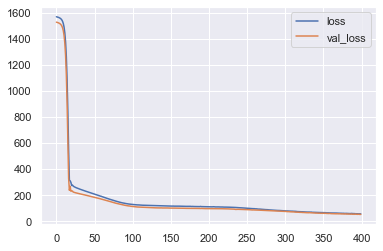

In [36]:
losses = pd.DataFrame(model_2.history.history)
losses.plot()

Again, we do not observe overfitting on the training data.

### Test the Model

In [40]:
predictions_2 = model_2.predict(X_test)

### Model Evaluation

In [41]:
# Model Evaluation Metrics
MAE_2 = mean_absolute_error(y_test,predictions_2)
RMSE_2 = np.sqrt(mean_squared_error(y_test,predictions_2))
EVS_2 = explained_variance_score(y_test,predictions_2)

print('EVALUATION METRICS')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_2}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_2}\nExplained Variance Score:\t\t{EVS_2}")

EVALUATION METRICS
-----------------------------
Mean Absolute Error (MAE):		5.738010522323906
Root Mean Squared Error (RMSE):		7.266889552774522
Explained Variance Score:		0.797885663610966


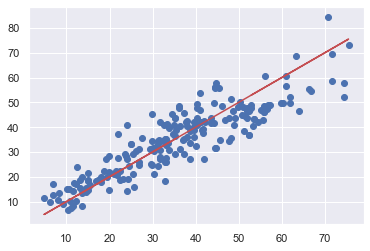

In [42]:
# Plot Model Predictions (Scatter)
plt.scatter(y_test,predictions_2)

# Plot Perfect predictions (Line)
plt.plot(y_test,y_test,'r')

The variance of our predicted values has been decreased, and our explained variance score has increased significantly. Let us continue with an even deeper neural network below to see if it will increase performance.

## Model 3 - ANN with 20 Hidden Layers

### Construct the Artificial Neural Network

In [43]:
model_3 = Sequential()

# Experiment with 20 hidden layers
model_3.add(Dense(8,activation='relu')) # All layers utilize rectified linear units (relu)
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(4,activation='relu')) # Experiment with number of nodes
model_3.add(Dense(2,activation='relu'))
model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse') # Use the adam optimization algorithm

### Train the Model on the Test Data

In [44]:
model_3.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
7/7 [==============================] - 0s 19ms/step - loss: 1568.9457 - val_loss: 1526.5952
Epoch 2/400
7/7 [==============================] - 0s 3ms/step - loss: 1565.9971 - val_loss: 1523.2644
Epoch 3/400
7/7 [==============================] - 0s 3ms/step - loss: 1562.3982 - val_loss: 1519.1927
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 1557.9240 - val_loss: 1514.1138
Epoch 5/400
7/7 [==============================] - 0s 3ms/step - loss: 1552.2657 - val_loss: 1507.4445
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 1544.5946 - val_loss: 1498.2806
Epoch 7/400
7/7 [==============================] - 0s 3ms/step - loss: 1533.9805 - val_loss: 1484.8186
Epoch 8/400
7/7 [==============================] - 0s 3ms/step - loss: 1517.8768 - val_loss: 1463.7943
Epoch 9/400
7/7 [==============================] - 0s 3ms/step - loss: 1491.9983 - val_loss: 1428.6099
Epoch 10/400
7/7 [==============================] - 0s 3ms/step - loss: 

Epoch 161/400
7/7 [==============================] - 0s 3ms/step - loss: 114.0907 - val_loss: 99.7452
Epoch 162/400
7/7 [==============================] - 0s 3ms/step - loss: 113.3528 - val_loss: 99.4975
Epoch 163/400
7/7 [==============================] - 0s 3ms/step - loss: 113.5492 - val_loss: 99.4377
Epoch 164/400
7/7 [==============================] - 0s 3ms/step - loss: 114.4651 - val_loss: 99.6511
Epoch 165/400
7/7 [==============================] - 0s 3ms/step - loss: 115.6763 - val_loss: 99.7146
Epoch 166/400
7/7 [==============================] - 0s 3ms/step - loss: 113.9110 - val_loss: 100.0259
Epoch 167/400
7/7 [==============================] - 0s 3ms/step - loss: 112.9944 - val_loss: 99.4759
Epoch 168/400
7/7 [==============================] - 0s 3ms/step - loss: 112.9036 - val_loss: 99.4911
Epoch 169/400
7/7 [==============================] - 0s 3ms/step - loss: 112.7131 - val_loss: 99.3961
Epoch 170/400
7/7 [==============================] - 0s 3ms/step - loss: 112.6853

7/7 [==============================] - 0s 3ms/step - loss: 108.9572 - val_loss: 95.1230
Epoch 322/400
7/7 [==============================] - 0s 3ms/step - loss: 108.7282 - val_loss: 95.2453
Epoch 323/400
7/7 [==============================] - 0s 3ms/step - loss: 108.7976 - val_loss: 95.2177
Epoch 324/400
7/7 [==============================] - 0s 3ms/step - loss: 109.5184 - val_loss: 94.8899
Epoch 325/400
7/7 [==============================] - 0s 3ms/step - loss: 110.0182 - val_loss: 94.7188
Epoch 326/400
7/7 [==============================] - 0s 3ms/step - loss: 109.7969 - val_loss: 94.6036
Epoch 327/400
7/7 [==============================] - 0s 3ms/step - loss: 109.6987 - val_loss: 94.7908
Epoch 328/400
7/7 [==============================] - 0s 3ms/step - loss: 109.6617 - val_loss: 95.2060
Epoch 329/400
7/7 [==============================] - 0s 3ms/step - loss: 109.4067 - val_loss: 95.1535
Epoch 330/400
7/7 [==============================] - 0s 3ms/step - loss: 109.0250 - val_loss: 95

### Visualize the Loss Function

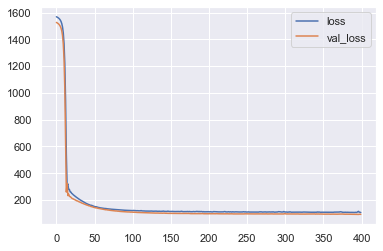

In [45]:
losses = pd.DataFrame(model_3.history.history)
losses.plot()

### Test the Model

In [46]:
predictions_3 = model_3.predict(X_test)

### Model Evaluation

In [50]:
# Model Evaluation Metrics
MAE_3 = mean_absolute_error(y_test,predictions_3)
RMSE_3 = np.sqrt(mean_squared_error(y_test,predictions_3))
EVS_3 = explained_variance_score(y_test,predictions_3)

print('EVALUATION METRICS')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_3}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_3}\nExplained Variance Score:\t\t{EVS_3}")

EVALUATION METRICS
-----------------------------
Mean Absolute Error (MAE):		7.611444954733247
Root Mean Squared Error (RMSE):		9.619967686192227
Explained Variance Score:		0.6426482928244076


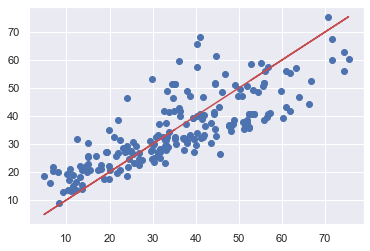

In [51]:
# Plot Model Predictions (Scatter)
plt.scatter(y_test,predictions_3)

# Plot Perfect predictions (Line)
plt.plot(y_test,y_test,'r')

Interesting - we would expect from the loss function that the data was not overfitted. But Our model evaluation metrics are worse with the deeper neural network. It appears that Model 3 has overfitted to the training data.

## Model 4 - ANN with 15 Hidden Layers

### Construct the Artificial Neural Network

In [52]:
model_4 = Sequential()

# Experiment with 15 hidden layers
model_4.add(Dense(8,activation='relu')) # All layers utilize rectified linear units (relu)
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(4,activation='relu')) # Experiment with number of nodes
model_4.add(Dense(2,activation='relu'))
model_4.add(Dense(1))

model_4.compile(optimizer='adam',loss='mse') # Use the adam optimization algorithm

### Train the Model on the Test Data

In [53]:
model_4.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
7/7 [==============================] - 0s 16ms/step - loss: 1569.6517 - val_loss: 1528.5724
Epoch 2/400
7/7 [==============================] - 0s 3ms/step - loss: 1568.9656 - val_loss: 1527.8374
Epoch 3/400
7/7 [==============================] - 0s 3ms/step - loss: 1568.1913 - val_loss: 1527.0037
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 1567.3076 - val_loss: 1526.0594
Epoch 5/400
7/7 [==============================] - 0s 3ms/step - loss: 1566.3008 - val_loss: 1524.9404
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 1565.0789 - val_loss: 1523.5724
Epoch 7/400
7/7 [==============================] - 0s 3ms/step - loss: 1563.5645 - val_loss: 1521.8213
Epoch 8/400
7/7 [==============================] - 0s 3ms/step - loss: 1561.5829 - val_loss: 1519.4446
Epoch 9/400
7/7 [==============================] - 0s 3ms/step - loss: 1558.8408 - val_loss: 1516.0094
Epoch 10/400
7/7 [==============================] - 0s 3ms/step - loss: 

7/7 [==============================] - 0s 3ms/step - loss: 59.4172 - val_loss: 52.9028
Epoch 163/400
7/7 [==============================] - 0s 3ms/step - loss: 58.4290 - val_loss: 53.2608
Epoch 164/400
7/7 [==============================] - 0s 3ms/step - loss: 58.2248 - val_loss: 52.1335
Epoch 165/400
7/7 [==============================] - 0s 2ms/step - loss: 57.6299 - val_loss: 51.9141
Epoch 166/400
7/7 [==============================] - 0s 3ms/step - loss: 57.2623 - val_loss: 51.6541
Epoch 167/400
7/7 [==============================] - 0s 3ms/step - loss: 57.2798 - val_loss: 51.7029
Epoch 168/400
7/7 [==============================] - 0s 3ms/step - loss: 56.8169 - val_loss: 51.6462
Epoch 169/400
7/7 [==============================] - 0s 3ms/step - loss: 56.1377 - val_loss: 51.1733
Epoch 170/400
7/7 [==============================] - 0s 3ms/step - loss: 55.4146 - val_loss: 50.6746
Epoch 171/400
7/7 [==============================] - 0s 3ms/step - loss: 55.1793 - val_loss: 51.4101
Epoc

7/7 [==============================] - 0s 3ms/step - loss: 43.9508 - val_loss: 44.4866
Epoch 244/400
7/7 [==============================] - 0s 3ms/step - loss: 43.5043 - val_loss: 45.8101
Epoch 245/400
7/7 [==============================] - 0s 3ms/step - loss: 44.0890 - val_loss: 45.8260
Epoch 246/400
7/7 [==============================] - 0s 3ms/step - loss: 43.9352 - val_loss: 44.3676
Epoch 247/400
7/7 [==============================] - 0s 3ms/step - loss: 44.3785 - val_loss: 47.4438
Epoch 248/400
7/7 [==============================] - 0s 3ms/step - loss: 43.9401 - val_loss: 44.5632
Epoch 249/400
7/7 [==============================] - 0s 3ms/step - loss: 45.1829 - val_loss: 47.5237
Epoch 250/400
7/7 [==============================] - 0s 3ms/step - loss: 44.3410 - val_loss: 45.1721
Epoch 251/400
7/7 [==============================] - 0s 3ms/step - loss: 43.9320 - val_loss: 45.2212
Epoch 252/400
7/7 [==============================] - 0s 3ms/step - loss: 43.6464 - val_loss: 44.0301
Epoc

### Visualize the Loss Function

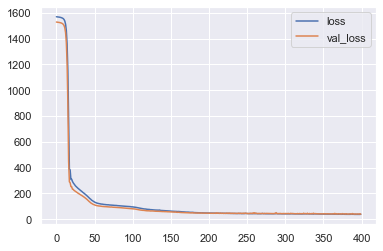

In [54]:
losses = pd.DataFrame(model_4.history.history)
losses.plot()

### Test the Model

In [55]:
predictions_4 = model_4.predict(X_test)

### Model Evaluation

In [57]:
# Model Evaluation Metrics
MAE_4 = mean_absolute_error(y_test,predictions_4)
RMSE_4 = np.sqrt(mean_squared_error(y_test,predictions_4))
EVS_4 = explained_variance_score(y_test,predictions_4)

print('EVALUATION METRICS')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_4}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_4}\nExplained Variance Score:\t\t{EVS_4}")

EVALUATION METRICS
-----------------------------
Mean Absolute Error (MAE):		4.913074249712009
Root Mean Squared Error (RMSE):		6.255377818962742
Explained Variance Score:		0.8488666652349717


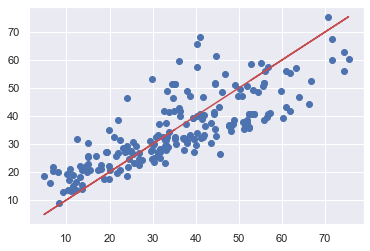

In [58]:
# Plot Model Predictions (Scatter)
plt.scatter(y_test,predictions_3)

# Plot Perfect predictions (Line)
plt.plot(y_test,y_test,'r')

### Model Comparison

Let us compare the evaluation metrics between models 1, 2, 3, and 4:

In [75]:
print('EVALUATION METRICS, MODEL 1')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE}\nRoot Mean Squared Error (RMSE):\t\t{RMSE}\nExplained Variance Score:\t\t{EVS}")
print('-----------------------------\n\n')
print('EVALUATION METRICS, MODEL 2')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_2}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_2}\nExplained Variance Score:\t\t{EVS_2}")
print('-----------------------------\n\n')
print('EVALUATION METRICS, MODEL 3')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_3}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_3}\nExplained Variance Score:\t\t{EVS_3}")
print('-----------------------------\n\n')
print('EVALUATION METRICS, MODEL 4')
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_4}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_4}\nExplained Variance Score:\t\t{EVS_4}")

EVALUATION METRICS, MODEL 1
-----------------------------
Mean Absolute Error (MAE):		7.23883411296363
Root Mean Squared Error (RMSE):		9.233359748913385
Explained Variance Score:		0.6691982422589368
-----------------------------


EVALUATION METRICS, MODEL 2
-----------------------------
Mean Absolute Error (MAE):		5.738010522323906
Root Mean Squared Error (RMSE):		7.266889552774522
Explained Variance Score:		0.797885663610966
-----------------------------


EVALUATION METRICS, MODEL 3
-----------------------------
Mean Absolute Error (MAE):		7.611444954733247
Root Mean Squared Error (RMSE):		9.619967686192227
Explained Variance Score:		0.6426482928244076
-----------------------------


EVALUATION METRICS, MODEL 4
-----------------------------
Mean Absolute Error (MAE):		4.913074249712009
Root Mean Squared Error (RMSE):		6.255377818962742
Explained Variance Score:		0.8488666652349717


## Determining Optimal Number of Hidden Layers

### Iterating Through 2-50 Hidden Layers

We now know that 15 hidden layers is more effective than 20. Let us iterate from 2 to 50 to explore the other possible number of layers, assuming each deep layer contains 8 nodes. Once we find the optimal number of nodes in that range, we can further experiment to optimize the ANN architecture. The for loop below will print out the evaluation metrics for each iteration in real time. Please note that it may take several minutes to run the following code.

In [138]:
results = []
for i in range(2,51):
    model_loop = Sequential()
    for j in range(0,(i+1)):
        model_loop.add(Dense(8,activation='relu'))
    model_loop.add(Dense(1))

    model_loop.compile(optimizer='adam',loss='mse')
    
    # We will reduce epochs to 200 to reduce run time. 
    # 200 was chosen based on previous loss function visualizations.
    model_loop.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200,verbose=0)
    
    # Model evaluation
    predictions_loop = model_loop.predict(X_test)

    MAE_loop = mean_absolute_error(y_test,predictions_loop)
    RMSE_loop = np.sqrt(mean_squared_error(y_test,predictions_loop))
    EVS_loop = explained_variance_score(y_test,predictions_loop)

    results.append([i, MAE_loop,RMSE_loop,EVS_loop])
    
    print(f"EVALUATION METRICS, HIDDEN LAYERS = {i}")
    print('-----------------------------')
    print(f"Mean Absolute Error (MAE):\t\t{MAE_loop}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_loop}\nExplained Variance Score:\t\t{EVS_loop}")
    print('-----------------------------\n\n')


EVALUATION METRICS, HIDDEN LAYERS = 2
-----------------------------
Mean Absolute Error (MAE):		8.120154531719615
Root Mean Squared Error (RMSE):		10.110879538827527
Explained Variance Score:		0.603573240618023
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 3
-----------------------------
Mean Absolute Error (MAE):		6.316067462847071
Root Mean Squared Error (RMSE):		8.01847651997628
Explained Variance Score:		0.7504890012616049
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 4
-----------------------------
Mean Absolute Error (MAE):		6.733620031967904
Root Mean Squared Error (RMSE):		8.728310582799304
Explained Variance Score:		0.7044559113122469
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 5
-----------------------------
Mean Absolute Error (MAE):		5.57671700866477
Root Mean Squared Error (RMSE):		6.996037765940304
Explained Variance Score:		0.8191998499945969
-----------------------------


EVALUATION METRICS, HIDDEN LAY

EVALUATION METRICS, HIDDEN LAYERS = 36
-----------------------------
Mean Absolute Error (MAE):		13.034295915029581
Root Mean Squared Error (RMSE):		16.054508710066703
Explained Variance Score:		-2.5621756938321028e-08
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 37
-----------------------------
Mean Absolute Error (MAE):		13.054120193037015
Root Mean Squared Error (RMSE):		16.0541907207132
Explained Variance Score:		0.0
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 38
-----------------------------
Mean Absolute Error (MAE):		34.27141976412061
Root Mean Squared Error (RMSE):		37.844512244337785
Explained Variance Score:		0.0
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 39
-----------------------------
Mean Absolute Error (MAE):		5.128188093240979
Root Mean Squared Error (RMSE):		6.508868622553171
Explained Variance Score:		0.8360870774081537
-----------------------------


EVALUATION METRICS, HIDDEN LAYERS = 40
-------

### Layer Optimization Analysis

In [144]:
# Convert the results into a numpy array
results_np = np.array(results)

# Store the np array in a pandas dataframe
results_df = pd.DataFrame(columns=['Hidden_Layers','MAE','RMSE','EVS'],data=results_np)

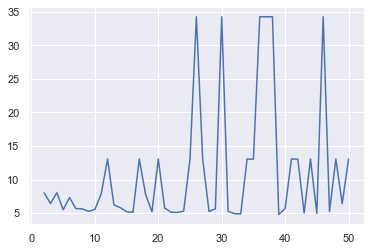

In [114]:
# Plot the mean absolute error for each iteration
X_plot = results_df['Hidden_Layers']
y_MAE = results_df['MAE']
plt.plot(X_plot,y_MAE)

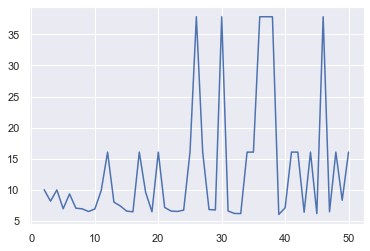

In [115]:
# Plot the root mean squared error for each iteration
y_RMSE = results_df['RMSE']
plt.plot(X_plot,y_RMSE)

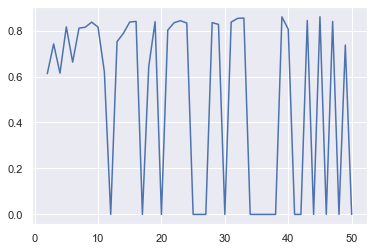

In [116]:
# Plot the explained variance score for each iteration
y_EVS = results_df['EVS']
plt.plot(X_plot,y_EVS)

In [140]:
# Determine the minimum MAE, RMSE, and maximum EVS
results_df.describe()

,Hidden_Layers,MAE,RMSE,EVS
count,49.00000,49.000000,49.000000,4.900000e+01
mean,26.00000,9.679436,11.720185,5.581656e-01
std,14.28869,7.974965,8.633592,3.607205e-01
min,2.00000,4.879614,6.234954,-2.562176e-08
25%,14.00000,5.533255,6.935423,0.000000e+00
50%,26.00000,6.057332,7.620311,7.755222e-01
75%,38.00000,13.041466,16.052520,8.195539e-01
max,50.00000,34.271702,37.844767,8.506060e-01


In [141]:
# Iteration with the lowest MAE
results_df[results_df['MAE']<4.88]

,Hidden_Layers,MAE,RMSE,EVS
43,45.0,4.879614,6.42268,0.841776


In [142]:
# Iteration with the lowest RMSE
results_df[results_df['RMSE']<6.24]

,Hidden_Layers,MAE,RMSE,EVS
42,44.0,4.953943,6.234954,0.850606


In [143]:
# Iteration with the largest EVS
results_df[results_df['EVS']>0.85]

,Hidden_Layers,MAE,RMSE,EVS
42,44.0,4.953943,6.234954,0.850606


We see that the minimum MAE is from 45 hidden layers, and the lowest RMSE and highest EVS are from 42 hidden layers. We will continue to work with the 44 hidden layer architecture.

## Experimenting with the 44 Hidden Layer Model

There is an infinite number of possible configurations for a neural network. We will explore three below, keeping the 44 total hidden layers.

### The Flat Model

In [162]:
optimization_results = []

model_flat = Sequential()
for i in range(45):
    model_flat.add(Dense(8,activation='relu'))
model_flat.add(Dense(1))

model_flat.compile(optimizer='adam',loss='mse')

# We will reset epochs to 200. 
model_flat.fit(x=X_train,y=y_train.values,
      validation_data=(X_test,y_test.values),
      batch_size=128,epochs=200,verbose=0)

# Model evaluation
predictions_flat = model_flat.predict(X_test)

MAE_flat = mean_absolute_error(y_test,predictions_flat)
RMSE_flat = np.sqrt(mean_squared_error(y_test,predictions_flat))
EVS_flat = explained_variance_score(y_test,predictions_flat)

optimization_results.append(['Flat', MAE_flat,RMSE_flat,EVS_flat])

print(f"EVALUATION METRICS, HIDDEN LAYERS = 44")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_flat}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_flat}\nExplained Variance Score:\t\t{EVS_flat}")
print('-----------------------------\n\n')


EVALUATION METRICS, HIDDEN LAYERS = 44
-----------------------------
Mean Absolute Error (MAE):		5.08355243840264
Root Mean Squared Error (RMSE):		6.466492906453852
Explained Variance Score:		0.8383600376691335
-----------------------------




### The Descending Model

In [180]:
model_desc = Sequential()
for i in range(39):
    model_desc.add(Dense(8,activation='relu'))
model_desc.add(Dense(7,activation='relu'))
model_desc.add(Dense(6,activation='relu'))
model_desc.add(Dense(5,activation='relu'))
model_desc.add(Dense(4,activation='relu'))
model_desc.add(Dense(3,activation='relu'))
model_desc.add(Dense(2,activation='relu'))
model_desc.add(Dense(1))

model_desc.compile(optimizer='adam',loss='mse')

model_desc.fit(x=X_train,y=y_train.values,
      validation_data=(X_test,y_test.values),
      batch_size=128,epochs=200,verbose=0)

predictions_desc = model_desc.predict(X_test)

MAE_desc = mean_absolute_error(y_test,predictions_desc)
RMSE_desc = np.sqrt(mean_squared_error(y_test,predictions_desc))
EVS_desc = explained_variance_score(y_test,predictions_desc)

optimization_results.append(['Desc', MAE_desc,RMSE_desc,EVS_desc])

print(f"EVALUATION METRICS, HIDDEN LAYERS = 44, DESCENDING")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_desc}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_desc}\nExplained Variance Score:\t\t{EVS_desc}")
print('-----------------------------\n\n')

EVALUATION METRICS, HIDDEN LAYERS = 44, DESCENDING
-----------------------------
Mean Absolute Error (MAE):		5.313633555532659
Root Mean Squared Error (RMSE):		6.834572877180595
Explained Variance Score:		0.8265445916481245
-----------------------------




In [191]:
# We can see that the descencing model performed worse than the flat model

optimization_df = pd.DataFrame(columns=['Model','MAE','RMSE','EVS'],data=np.array(optimization_results))
optimization_df

,Model,MAE,RMSE,EVS
0,Flat,5.08355243840264,6.466492906453852,0.8383600376691335
1,Desc,5.313633555532659,6.834572877180595,0.8265445916481245


### The Flat Dropout Model

In [202]:
model_flat_drop = Sequential()

# Input layer
model_flat_drop.add(Dense(8,activation='relu'))

# Hidden Layers
for i in range(22): # Let's make half of the layers in the network dropout layers at a 50% dropout rate
    model_flat_drop.add(Dense(8,activation='relu'))
    
    model_flat_drop.add(Dense(8,activation='relu'))
    model_flat_drop.add(Dropout(0.5))

# Output layer
model_flat_drop.add(Dense(1))

model_flat_drop.compile(optimizer='adam',loss='mse')

model_flat_drop.fit(x=X_train,y=y_train.values,
      validation_data=(X_test,y_test.values),
      batch_size=128,epochs=200,verbose=0)

# Model evaluation
predictions_flat_drop = model_flat_drop.predict(X_test)

MAE_flat_drop = mean_absolute_error(y_test,predictions_flat_drop)
RMSE_flat_drop = np.sqrt(mean_squared_error(y_test,predictions_flat_drop))
EVS_flat_drop = explained_variance_score(y_test,predictions_flat_drop)

optimization_results.append(['Flat_Drop', MAE_flat_drop,RMSE_flat_drop,EVS_flat_drop])

print(f"EVALUATION METRICS, ACTIVE HIDDEN LAYERS = 22, DROPOUT HIDDEN LAYERS = 22")
print('-----------------------------')
print(f"Mean Absolute Error (MAE):\t\t{MAE_flat_drop}\nRoot Mean Squared Error (RMSE):\t\t{RMSE_flat_drop}\nExplained Variance Score:\t\t{EVS_flat_drop}")
print('-----------------------------\n\n')


EVALUATION METRICS, ACTIVE HIDDEN LAYERS = 22, DROPOUT HIDDEN LAYERS = 22
-----------------------------
Mean Absolute Error (MAE):		18.2897413887098
Root Mean Squared Error (RMSE):		22.422906635113907
Explained Variance Score:		0.0
-----------------------------




## Conclusions & Recommendations

We conclude that the "flat model" deep neural network containing 44 hidden layers of 8 nodes each, with no dropout nodes, is the optimal model from all the models tested in this project. 

Additional models with different numbers of hidden layers and different architectures of the node
networks could be subject to further experimentation and optimization. All three models containing the 44 hidden layers studied in this project are saved in the Keras_ANN_Models folder. 

As discussed in the Exploratory Data Analysis code notebook, the compressive strength of concrete inreases rapidly from 0 to 28 days, then more much more stably from 28 days onward. A more intuitive and practical engineering model for predicting the compressive strength of concrete would rely on a given dataset containing only data of a certain curing time. Common testing times are at 3, 7, 14, 28, 60, 90, 128, and 365 days, with the 28 day mark being the industry standard. We analyze linear models at 28 days cure time in the Comparison with Linear Models notebook.

This dataset presented a unique challenge of predicting compressive strength not only as a function of its constituents, but also of time. The model in this project is able to predict the compressive strength of concrete to within a mean absolute error of 5.08 Megapascals (MPa), a root mean square error of 6.47 MPa, and an explained variance score of 0.838. The actual standard deviation for compressive strength in the dataset is 16.71 MPa. Therefore, the MAE is approximately 0.30σ, and The RMSE is approximately 0.39σ. 

Given the high variance of the data, particularly in the 0 to 28 day range, these errors are reasonable. We recommend performing additional studies on larger datasets that represent a constant curing time, particularly the standard 28-day curing time, for the most practical engineering applications. Additional analysis comparing the ANN model with linear models is presented in the Model Analysis folder.